<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
# web location:
local_csv = './NHL_Data_GA.csv'

### 1. Load the NHL data

In [7]:
# A:
df = pd.read_csv(local_csv)
df

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Florida11,72,3,2155:11:00,78,96,2.17,2.67,44.8,1151,...,49.3,2101,2151,58.5,59.9,49.4,6.78,91.99,988,1270
86,Columbus11,68,3,2034:54:00,86,93,2.54,2.74,48.0,1075,...,51.1,1975,1905,58.2,56.2,50.9,8.00,91.18,992,1077
87,Colorado12,65,3,2129:37:00,83,89,2.34,2.51,48.3,1157,...,49.6,2123,2059,59.8,58.0,50.8,7.17,92.27,994,902
88,Edmonton10,62,3,1983:44:00,72,107,2.18,3.24,40.2,982,...,45.6,1765,2149,53.4,65.0,45.1,7.33,90.51,978,723


### 2. Perform any required data cleaning. Do some EDA.

In [8]:
# A:
df.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


In [12]:
df.isna()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 3. Set up the `Rank` variable as your target. How many classes are there?

In [14]:
# A: 3
y = df.Rank
y

0     1
1     1
2     1
3     1
4     1
     ..
85    3
86    3
87    3
88    3
89    3
Name: Rank, Length: 90, dtype: int64

### 4. What is the baseline accuracy?

In [17]:
# A:
vc = y.value_counts()
most_freq_class = vc.index[0]
most_freq_class
print(vc)

3    31
2    30
1    29
Name: Rank, dtype: int64


In [20]:
vc[most_freq_class] / len(y)

0.34444444444444444

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [22]:
# A:
features = ['GF%', 'CF%', 'SF%', 'FF%']
X = df[features]
X

,GF%,CF%,SF%,FF%
0,61.2,52.5,51.5,51.3
1,56.6,53.4,52.0,53.1
2,57.0,51.4,50.6,50.9
3,55.6,57.1,57.7,58.1
4,53.8,52.6,49.2,51.0
...,...,...,...,...
85,44.8,49.4,49.0,49.3
86,48.0,50.9,50.5,51.1
87,48.3,50.8,50.1,49.6
88,40.2,45.1,46.6,45.6


1.0

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
knn.fit(X, y)
y_pred_class = knn.predict(X)
ascore = metrics.accuracy_score(y, y_pred_class)
ascore


1.0

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [9]:
# A: We have a perfect accuracy score of 1.0.  It's better than baseline

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [34]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = .5)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
ascore = metrics.accuracy_score(y_test, y_pred)
ascore

0.4666666666666667

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [36]:
# A:
knn = KNeighborsClassifier(n_neighbors=45, weights = 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
ascore = metrics.accuracy_score(y_test, y_pred)
ascore

0.6

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

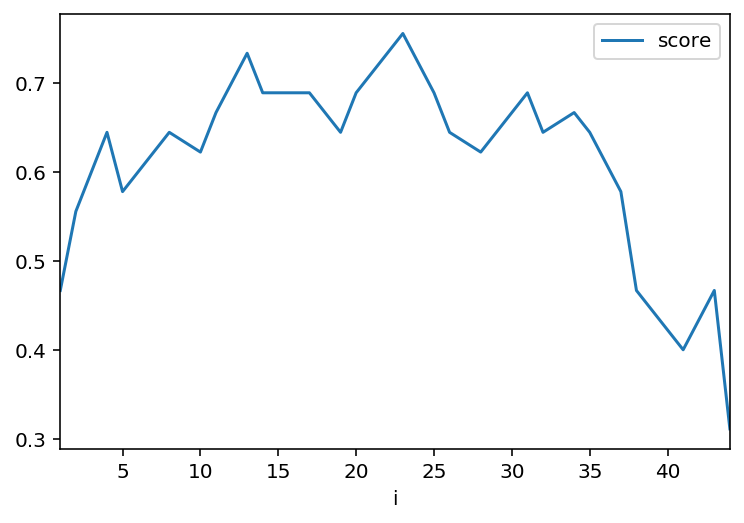

In [40]:
# A:
scores = []
for i in range(1,46):
    if i % 3 != 0:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        ascore = metrics.accuracy_score(y_test, pred)
        scores.append([i, ascore])
    
data = pd.DataFrame(scores,columns=['i','score'])
data.plot.line(x='i',y='score');

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

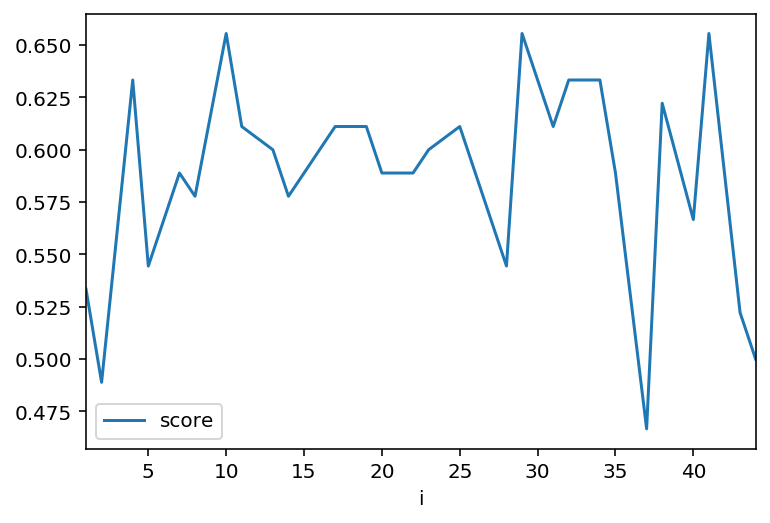

In [44]:
# A:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)

mean_scores = []
for i in range(1,46):
    if i % 3 != 0:
        scores = []
        for train_index, test_index in kf.split(X, y):
            knn = KNeighborsClassifier(n_neighbors=i).fit(X.iloc[train_index], y.iloc[train_index])
            scores.append(metrics.accuracy_score(y.iloc[test_index], knn.predict(X.iloc[test_index])))

        mean_scores.append([i, np.mean(scores)])    

data = pd.DataFrame(mean_scores,columns=['i','score'])
data.plot.line(x='i',y='score');

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [45]:
# A:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3
0,2.429025,0.893692,0.555569,0.479215
1,1.433070,1.211885,0.735559,1.126156
2,1.519674,0.504788,0.231587,0.335451
3,1.216557,2.520014,2.787446,2.923215
4,0.826836,0.929046,-0.272385,0.371392
...,...,...,...,...
85,-1.121773,-0.202308,-0.344381,-0.239608
86,-0.428935,0.328014,0.195589,0.407333
87,-0.363981,0.292659,0.051597,-0.131784
88,-2.117729,-1.722566,-1.208333,-1.569431


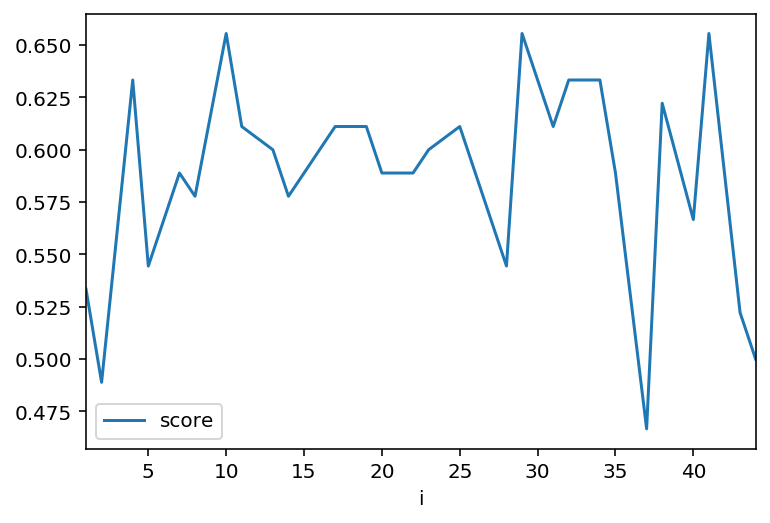

In [46]:
mean_scores2 = []
for i in range(1,46):
    if i % 3 != 0:
        scores = []
        for train_index, test_index in kf.split(X, y):
            knn = KNeighborsClassifier(n_neighbors=i).fit(X.iloc[train_index], y.iloc[train_index])
            scores.append(metrics.accuracy_score(y.iloc[test_index], knn.predict(X.iloc[test_index])))

        mean_scores2.append([i, np.mean(scores)])    
    

data = pd.DataFrame(mean_scores,columns=['i','score'])
data.plot.line(x='i',y='score');